# Analysis of links between behaviour and mechanical signals

In [1]:
import pandas as pd
import os.path
import numpy as np
import glob
from matplotlib import pyplot as plt
import seaborn as sns
import pingouin as pg
import openpyxl
import re
from scipy import signal

&copy; Fouad Baamal, JJ Aucouturier, 2025

# ALL DATA 

In [2]:
for i in glob.glob("./data/meca/series/*") :
    print(i)

./data/meca/series\Sujet 06
./data/meca/series\Sujet 07
./data/meca/series\Sujet 08
./data/meca/series\Sujet 09
./data/meca/series\Sujet 10
./data/meca/series\Sujet 11
./data/meca/series\Sujet 12
./data/meca/series\Sujet 13
./data/meca/series\Sujet 14
./data/meca/series\Sujet 15
./data/meca/series\Sujet 16
./data/meca/series\Sujet 17
./data/meca/series\Sujet 18
./data/meca/series\Sujet 19
./data/meca/series\Sujet 21
./data/meca/series\Sujet 22
./data/meca/series\Sujet 23
./data/meca/series\Sujet 24
./data/meca/series\Sujet 25
./data/meca/series\Sujet 26
./data/meca/series\Sujet 27


In [3]:
if False : 
    def resample_all_cols(df, sr, new_sr, time_col='Time [s]'):
        """
        Resample selected data columns of a DataFrame from sr to new_sr.
        
        Parameters:
        - df: input DataFrame
        - sr: original sampling rate (Hz)
        - new_sr: target sampling rate (Hz)
        - time_col: name of the time column
        
        Returns:
        - resampled DataFrame
        """
        # List of columns to resample
        data_cols = ['Displacement [mm]', 'Fn [N]','Ft [N]', 'COF []', 'Acceleration [m/s²]']
        data_cols = [col for col in data_cols if col in df.columns]
        
        # Time array
        time = np.array(df[time_col])
        n_samples = int((len(time) / sr) * new_sr) 

        # Resample each data column
        resampled_data = {}
        for col in data_cols:
            resampled_data[col], new_time = signal.resample(
                np.array(df[col]), num=n_samples, t=time
            )
        
        # Construct new DataFrame
        resampled_df = pd.DataFrame(resampled_data)
        resampled_df[time_col] = new_time
        
        return resampled_df
    cols = ['Time [s]', 'Displacement [mm]', 'Fn [N]', 'Ft [N]', 'COF []', 'Acceleration [m/s²]']

In [4]:
if False :
    data = pd.DataFrame()
    i = int(input("choisir le nombre de sujet à depouiller : "))
    j = 1
    for subject_files in glob.glob("./data/meca/series/*") :    # load all subjects
        for serie in glob.glob("%s/*"%subject_files) :# load a single file of a Subject
            data_serie = pd.read_excel(serie)
            data_serie[cols] = data_serie[cols].apply(pd.to_numeric)
            resampled_data = resample_all_cols(data_serie, sr=5000, new_sr=100)
            resampled_data['subj'] = int(subject_files[-2:])
            resampled_data['block'] = int(serie[40])
            resampled_data['trial'] = int(serie[42:44])
            resampled_data['stim_order'] = int(serie[53])

            resampled_data['normalised_time'] = np.linspace(1,100,len(resampled_data))
            #resampled_data.periode = resampled_data.periode + 1
            data = pd.concat([data, resampled_data], ignore_index=True)  # add data subject to the previous one
        print("subject file processed : %s"%subject_files)
        if j == i :
            break
        j = j+1

In [5]:
# Enregistrer la dataframe ( Juste pour la première fois : )
if False :
    data.to_csv('data/all_data.csv')

In [7]:
data = pd.read_csv('data/all_data.csv',index_col=0)
data

,Displacement [mm],Fn [N],Ft [N],COF [],Acceleration [m/s²],Time [s],subj,block,trial,stim_order,normalised_time
0,21.289894,0.132235,0.403616,3.052261,-1.965516,2.4468,6,1,0,1,1.000000
1,20.772082,0.130869,0.400328,3.058999,-1.472870,2.4470,6,1,0,1,1.041949
2,20.230913,0.129739,0.399671,3.080563,-1.637156,2.4472,6,1,0,1,1.083898
3,19.661823,0.128897,0.400328,3.105799,-1.670056,2.4474,6,1,0,1,1.125847
4,19.084907,0.128146,0.400329,3.124001,-2.162808,2.4476,6,1,0,1,1.167797
...,...,...,...,...,...,...,...,...,...,...,...
16408124,58.631441,1.323029,0.588102,0.444512,1.485856,5.2458,27,4,24,2,99.803669
16408125,58.645615,1.320701,0.590074,0.446789,3.128176,5.2460,27,4,24,2,99.852752
16408126,58.661244,1.318856,0.590403,0.447663,2.931085,5.2462,27,4,24,2,99.901834
16408127,58.678386,1.317370,0.590403,0.448168,1.945676,5.2464,27,4,24,2,99.950917


## Load Behavioural Data

In [8]:
data_df = pd.read_csv('data/behaviour/all_data.csv')
data_df.stim_order = data_df.stim_order +1 
data_df

,subj,trial,block,practice,condition,sex,age,date,data_file,texture_id,stim_order,diameter,opening,spacing,response,rt
0,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857
1,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E064,2,50.0,140.0,190.0,True,10.857
2,6,1,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial1.csv,E061,1,80.0,170.0,250.0,True,11.883
3,6,1,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial1.csv,E006,2,260.0,20.0,280.0,False,11.883
4,6,2,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial2.csv,E048,1,170.0,170.0,340.0,False,10.245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4395,27,22,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E078,2,80.0,110.0,190.0,False,8.466
4396,27,23,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E038,1,110.0,80.0,190.0,True,7.617
4397,27,23,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E076,2,50.0,50.0,100.0,False,7.617
4398,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E044,1,170.0,140.0,310.0,True,7.534


## Join All data and behavioural data

In [9]:
beha_meca_data = pd.merge(data_df, data, on=['subj', 'trial','block','stim_order'])
#beha_meca_data.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_').title()[1:].lower(),inplace=True)  # snake_case
#beha_meca_data.rename(columns=lambda x: re.sub(r'[^a-z0-9_]', '', x.strip().lower().replace(' ', '_')), inplace=True)

In [10]:
pd.set_option('display.max_columns',beha_meca_data.shape[1])
beha_meca_data

,subj,trial,block,practice,condition,sex,age,date,data_file,texture_id,stim_order,diameter,opening,spacing,response,rt,Displacement [mm],Fn [N],Ft [N],COF [],Acceleration [m/s²],Time [s],normalised_time
0,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,21.289894,0.132235,0.403616,3.052261,-1.965516,2.4468,1.000000
1,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,20.772082,0.130869,0.400328,3.058999,-1.472870,2.4470,1.041949
2,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,20.230913,0.129739,0.399671,3.080563,-1.637156,2.4472,1.083898
3,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,19.661823,0.128897,0.400328,3.105799,-1.670056,2.4474,1.125847
4,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,19.084907,0.128146,0.400329,3.124001,-2.162808,2.4476,1.167797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16408124,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,58.631441,1.323029,0.588102,0.444512,1.485856,5.2458,99.803669
16408125,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,58.645615,1.320701,0.590074,0.446789,3.128176,5.2460,99.852752
16408126,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,58.661244,1.318856,0.590403,0.447663,2.931085,5.2462,99.901834
16408127,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,58.678386,1.317370,0.590403,0.448168,1.945676,5.2464,99.950917


# Kernels :

## Temporal kernels: Fn, Ft, Acc

In [11]:
data

,Displacement [mm],Fn [N],Ft [N],COF [],Acceleration [m/s²],Time [s],subj,block,trial,stim_order,normalised_time
0,21.289894,0.132235,0.403616,3.052261,-1.965516,2.4468,6,1,0,1,1.000000
1,20.772082,0.130869,0.400328,3.058999,-1.472870,2.4470,6,1,0,1,1.041949
2,20.230913,0.129739,0.399671,3.080563,-1.637156,2.4472,6,1,0,1,1.083898
3,19.661823,0.128897,0.400328,3.105799,-1.670056,2.4474,6,1,0,1,1.125847
4,19.084907,0.128146,0.400329,3.124001,-2.162808,2.4476,6,1,0,1,1.167797
...,...,...,...,...,...,...,...,...,...,...,...
16408124,58.631441,1.323029,0.588102,0.444512,1.485856,5.2458,27,4,24,2,99.803669
16408125,58.645615,1.320701,0.590074,0.446789,3.128176,5.2460,27,4,24,2,99.852752
16408126,58.661244,1.318856,0.590403,0.447663,2.931085,5.2462,27,4,24,2,99.901834
16408127,58.678386,1.317370,0.590403,0.448168,1.945676,5.2464,27,4,24,2,99.950917


In [12]:
columns_to_keep = ['subj', 'block', 'trial','Time [s]','stim_order','Fn [N]','Ft [N]','COF []','Acceleration [m/s²]','normalised_time']  # Replace with the columns you want to keep
data_ker = data[[col for col in data.columns if col in columns_to_keep]]
data_ker

,Fn [N],Ft [N],COF [],Acceleration [m/s²],Time [s],subj,block,trial,stim_order,normalised_time
0,0.132235,0.403616,3.052261,-1.965516,2.4468,6,1,0,1,1.000000
1,0.130869,0.400328,3.058999,-1.472870,2.4470,6,1,0,1,1.041949
2,0.129739,0.399671,3.080563,-1.637156,2.4472,6,1,0,1,1.083898
3,0.128897,0.400328,3.105799,-1.670056,2.4474,6,1,0,1,1.125847
4,0.128146,0.400329,3.124001,-2.162808,2.4476,6,1,0,1,1.167797
...,...,...,...,...,...,...,...,...,...,...
16408124,1.323029,0.588102,0.444512,1.485856,5.2458,27,4,24,2,99.803669
16408125,1.320701,0.590074,0.446789,3.128176,5.2460,27,4,24,2,99.852752
16408126,1.318856,0.590403,0.447663,2.931085,5.2462,27,4,24,2,99.901834
16408127,1.317370,0.590403,0.448168,1.945676,5.2464,27,4,24,2,99.950917


In [13]:
from scipy.interpolate import interp1d

def resample_group_to_100_rows(group):
    n = len(group)  # a group is a single mechanical signal
    group = group.reset_index(drop=True)
    group['original_index'] = np.linspace(0, 1, n)  # previous group index : it depends on the number of rows of each group

    new_index = np.linspace(0, 1, 100) # new index, 100 row for each group

    interpolated = {}
    for col in group.select_dtypes(include=[np.number]).columns:  # interpolate numerical columns
        if col == 'original_index':
            continue  # don't include original index in interpolation
        f = interp1d(group['original_index'], group[col], kind='linear')
        interpolated[col] = f(new_index)

    new_group = pd.DataFrame(interpolated)

    # Add categorical columns
    for col in ['subj', 'block', 'trial', 'stim_order']:
        new_group[col] = group[col].iloc[0]

    # Add perfectly clean integer 'normalised_time' column from 1 to 100
    new_group['normalised_time'] = np.arange(1, 101)

    return new_group
resampled_data_ker = (
    data_ker.groupby(['subj', 'block', 'trial', 'stim_order'], group_keys=False)
           .apply(resample_group_to_100_rows)
           .reset_index(drop=True)
)
resampled_data_ker

g:\Utilisateurs\fouad.baamal\AppData\Local\Temp\ipykernel_8668\262713481.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(resample_group_to_100_rows)


,Fn [N],Ft [N],COF [],Acceleration [m/s²],Time [s],subj,block,trial,stim_order,normalised_time
0,0.132235,0.403616,3.052261,-1.965516,2.446800,6,1,0,1,1
1,0.142024,0.354789,2.498223,0.694788,2.451568,6,1,0,1,2
2,0.123446,0.378222,3.063851,0.497435,2.456335,6,1,0,1,3
3,0.115551,0.372364,3.222931,-0.726126,2.461103,6,1,0,1,4
4,0.129192,0.350273,2.711269,0.085477,2.465871,6,1,0,1,5
...,...,...,...,...,...,...,...,...,...,...
416595,1.321577,0.592702,0.448481,0.884830,5.230301,27,4,24,2,96
416596,1.333148,0.585402,0.439112,-0.209612,5.234376,27,4,24,2,97
416597,1.320633,0.591562,0.447940,-0.549578,5.238451,27,4,24,2,98
416598,1.332499,0.594183,0.445916,0.920339,5.242525,27,4,24,2,99


In [14]:
beha_meca_ker = pd.merge(data_df, resampled_data_ker, on=['subj', 'trial','block','stim_order'])
beha_meca_ker

,subj,trial,block,practice,condition,sex,age,date,data_file,texture_id,stim_order,diameter,opening,spacing,response,rt,Fn [N],Ft [N],COF [],Acceleration [m/s²],Time [s],normalised_time
0,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,0.132235,0.403616,3.052261,-1.965516,2.446800,1
1,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,0.142024,0.354789,2.498223,0.694788,2.451568,2
2,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,0.123446,0.378222,3.063851,0.497435,2.456335,3
3,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,0.115551,0.372364,3.222931,-0.726126,2.461103,4
4,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,0.129192,0.350273,2.711269,0.085477,2.465871,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416595,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,1.321577,0.592702,0.448481,0.884830,5.230301,96
416596,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,1.333148,0.585402,0.439112,-0.209612,5.234376,97
416597,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,1.320633,0.591562,0.447940,-0.549578,5.238451,98
416598,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,1.332499,0.594183,0.445916,0.920339,5.242525,99


In [15]:
data_melt = pd.melt(beha_meca_ker,
        id_vars=['subj','trial','block','sex','age','condition','response', 'stim_order', 'texture_id','normalised_time'],
        value_vars=['Fn [N]','Ft [N]', 'COF []', 'Acceleration [m/s²]'],
        var_name='feature')

In [16]:
data_melt.sort_values(by=['subj','block','trial'])

,subj,trial,block,sex,age,condition,response,stim_order,texture_id,normalised_time,feature,value
0,6,0,1,f,23,soft,False,1,E030,1,Fn [N],0.132235
1,6,0,1,f,23,soft,False,1,E030,2,Fn [N],0.142024
2,6,0,1,f,23,soft,False,1,E030,3,Fn [N],0.123446
3,6,0,1,f,23,soft,False,1,E030,4,Fn [N],0.115551
4,6,0,1,f,23,soft,False,1,E030,5,Fn [N],0.129192
...,...,...,...,...,...,...,...,...,...,...,...,...
1666395,27,24,4,m,20,rug,False,2,E075,96,Acceleration [m/s²],0.884830
1666396,27,24,4,m,20,rug,False,2,E075,97,Acceleration [m/s²],-0.209612
1666397,27,24,4,m,20,rug,False,2,E075,98,Acceleration [m/s²],-0.549578
1666398,27,24,4,m,20,rug,False,2,E075,99,Acceleration [m/s²],0.920339


In [17]:
# z-score feature values
#zscore = lambda x: (x-np.nanmean(x))/np.nanstd(x)
# zscore TAS and weights
#data_melt['value'] = data_melt.groupby(['normalised_time','feature'])['value'].transform(zscore) 

# compute difference between positives and negatives in each trial

positives = data_melt.loc[data_melt.response == True].reset_index()
negatives = data_melt.loc[data_melt.response == False].reset_index()
#kernels = pd.merge(positives, negatives, on=['subj','condition', 'sex','age','block','trial','texture_id', 'normalised_time', 'feature'],suffixes=['+','-'])

kernels = pd.merge(positives, negatives, on=['subj','condition','sex','age','block','trial','feature','normalised_time'],suffixes=['+','-'])

kernels['delta_value']=kernels['value+']-kernels['value-']  
kernels.drop(['index+', 'index-',
              'response+','response-',
              'stim_order+','stim_order-',
              'texture_id+','texture_id-',
              'value+','value-'], axis=1, inplace=True)
kernels['square_delta_value'] = kernels['delta_value']**2
for_norm = kernels.groupby(['subj','block','trial','feature']).agg({'square_delta_value':'mean'}).reset_index()
kernels = pd.merge(kernels, for_norm, on=['subj','block','trial','feature'], suffixes=['','_mean'])
kernels['norm_delta_value'] = kernels['delta_value']/np.sqrt(kernels['square_delta_value_mean'])
kernels.drop(['delta_value','square_delta_value', 'square_delta_value_mean',], axis=1, inplace=True)
kernels = kernels.groupby(['subj','condition','feature','normalised_time']).norm_delta_value.mean().reset_index()
 

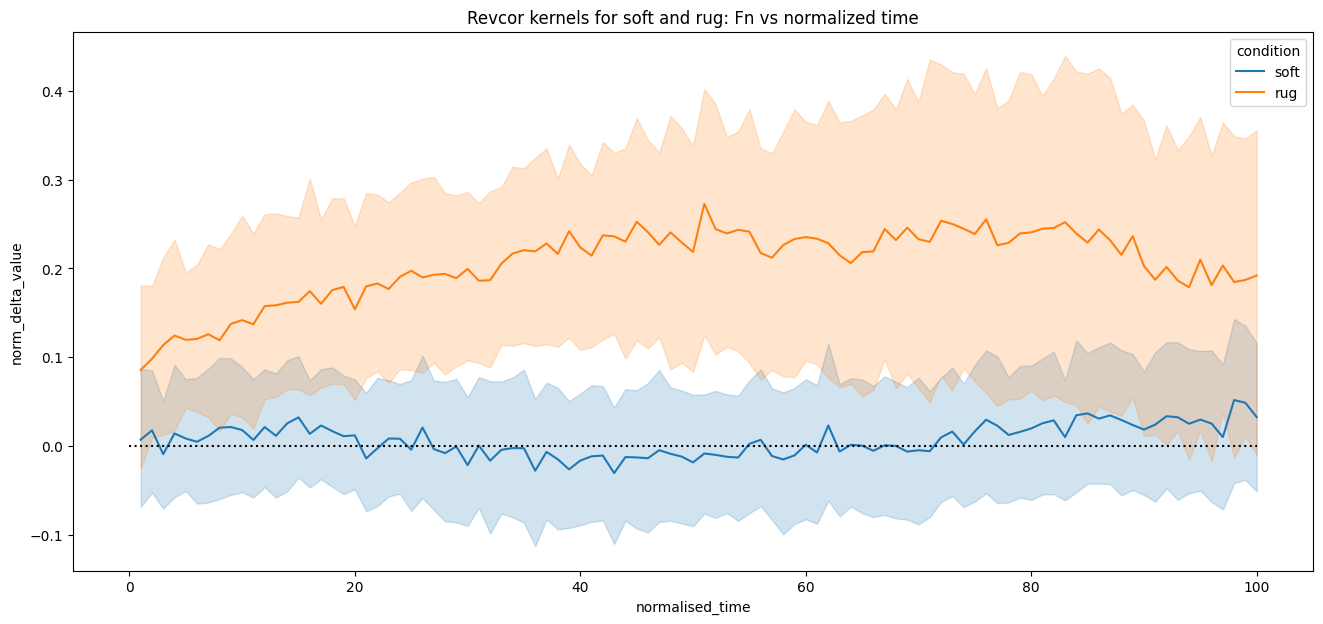

In [18]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Fn [N]'],
              hue="condition",
             x="normalised_time",
             y="norm_delta_value", errorbar=('ci', 95))
plt.title("Revcor kernels for soft and rug: Fn vs normalized time")
plt.plot([0,100],[0,0],'k:')

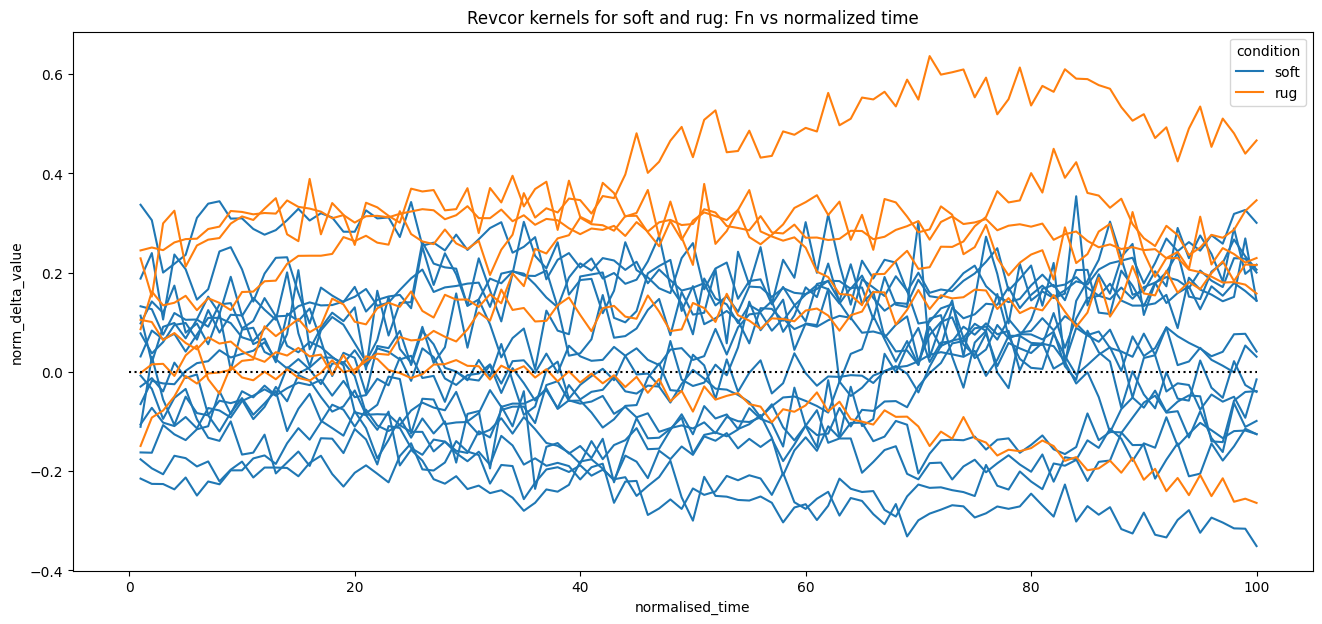

In [19]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Fn [N]'],
              hue="condition",
             x="normalised_time",
             y="norm_delta_value", units='subj', estimator=None)
plt.title("Revcor kernels for soft and rug: Fn vs normalized time")
plt.plot([0,100],[0,0],'k:')

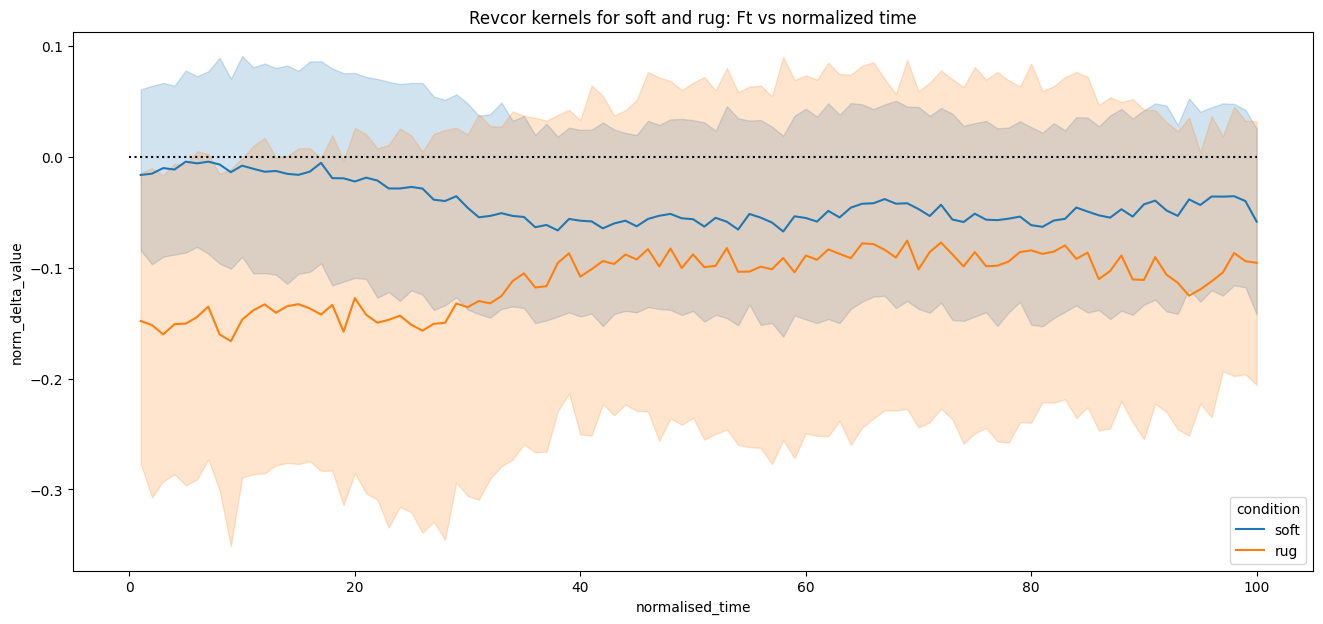

In [20]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Ft [N]'],
              hue="condition",
             x="normalised_time",
             y="norm_delta_value", errorbar=('ci', 95))
plt.title("Revcor kernels for soft and rug: Ft vs normalized time")
plt.plot([0,100],[0,0],'k:')

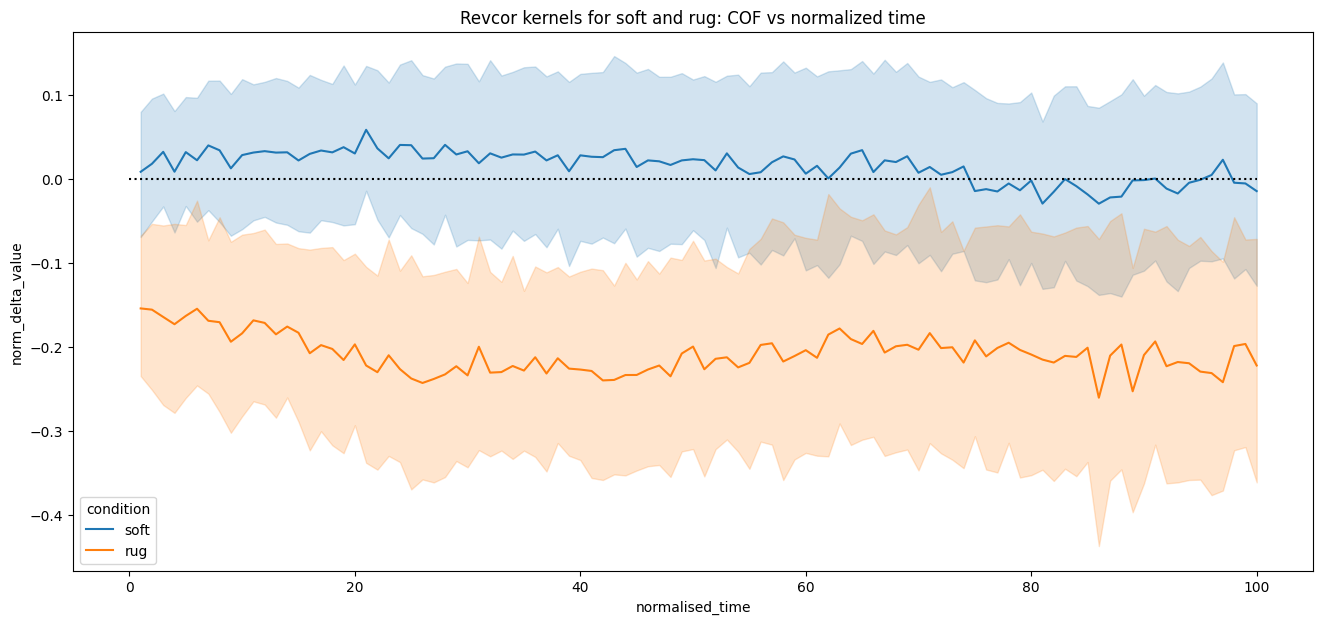

In [21]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='COF []'],
              hue="condition",
             x="normalised_time",
             y="norm_delta_value", )
plt.title("Revcor kernels for soft and rug: COF vs normalized time")
plt.plot([0,100],[0,0],'k:')

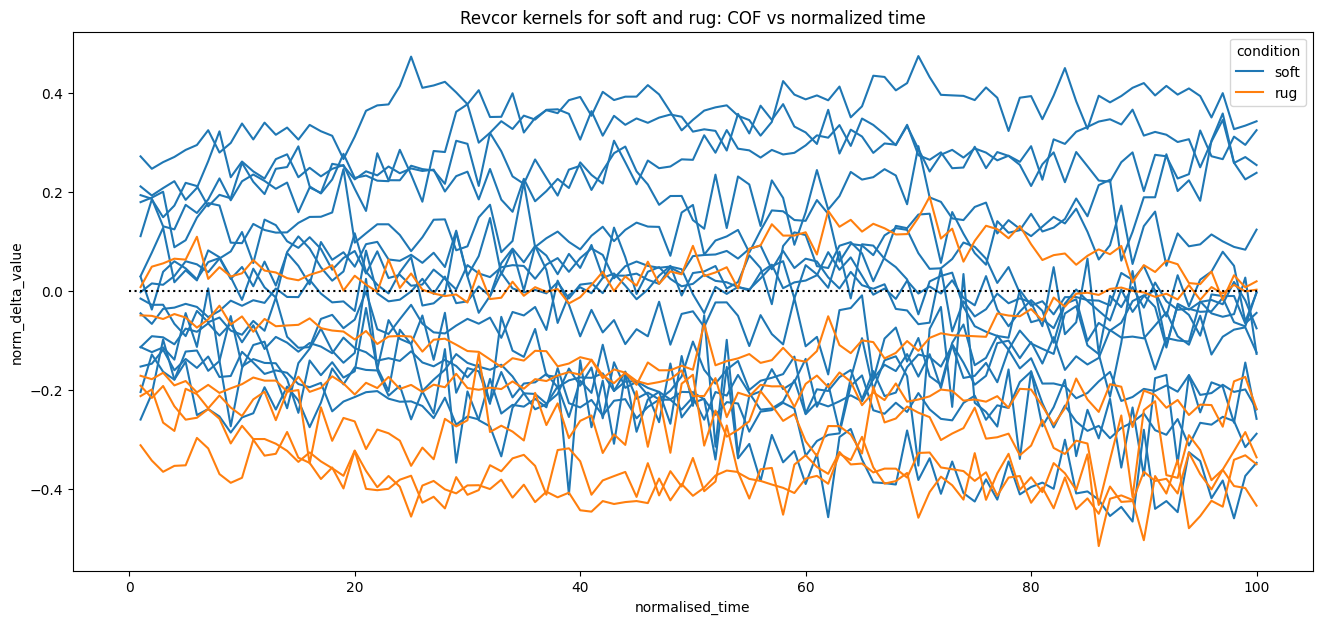

In [22]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='COF []'],
              hue="condition",
             x="normalised_time",
             y="norm_delta_value", units='subj',estimator=None)
plt.title("Revcor kernels for soft and rug: COF vs normalized time")
plt.plot([0,100],[0,0],'k:')

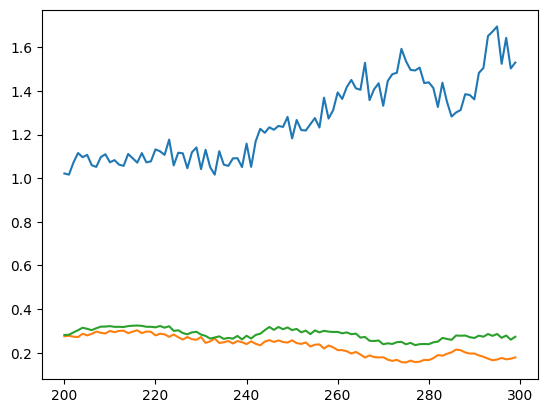

In [23]:
sig = resampled_data_ker[(resampled_data_ker.subj==6)&(resampled_data_ker.block==1)&(resampled_data_ker.trial==1)&(resampled_data_ker.stim_order==1)]
plt.plot(sig['COF []'])
plt.plot(sig['Fn [N]'])
plt.plot(sig['Ft [N]'])


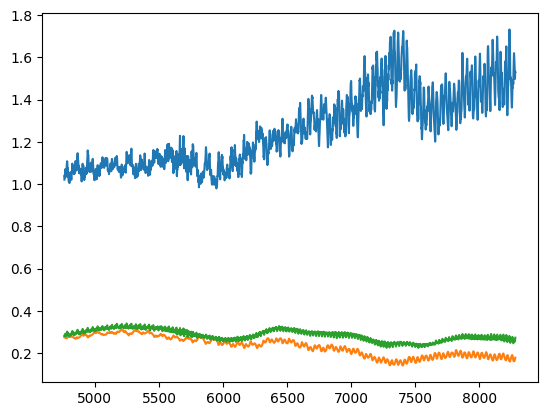

In [24]:
sig = data[(data.subj==6)&(data.block==1)&(data.trial==1)&(data.stim_order==1)]
plt.plot(sig['COF []'])
plt.plot(sig['Fn [N]'])
plt.plot(sig['Ft [N]'])


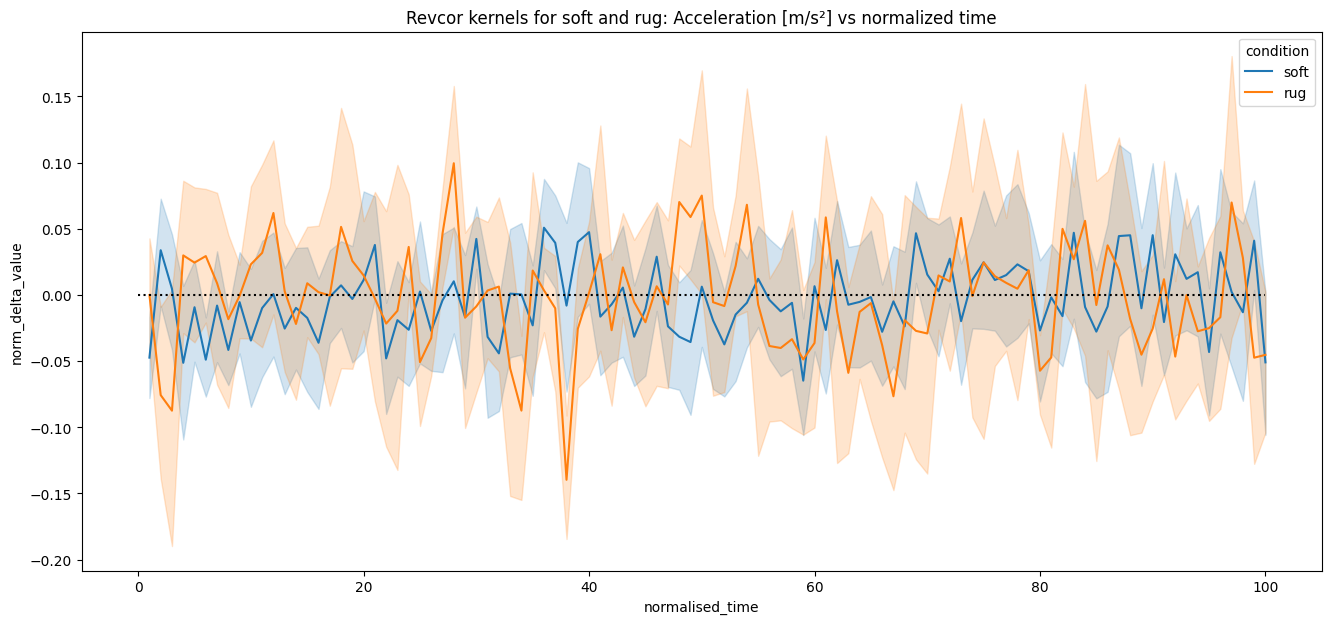

In [25]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Acceleration [m/s²]'],
              hue="condition",
             x="normalised_time",
             y="norm_delta_value", )
plt.title("Revcor kernels for soft and rug: Acceleration [m/s²] vs normalized time")
plt.plot([0,100],[0,0],'k:')

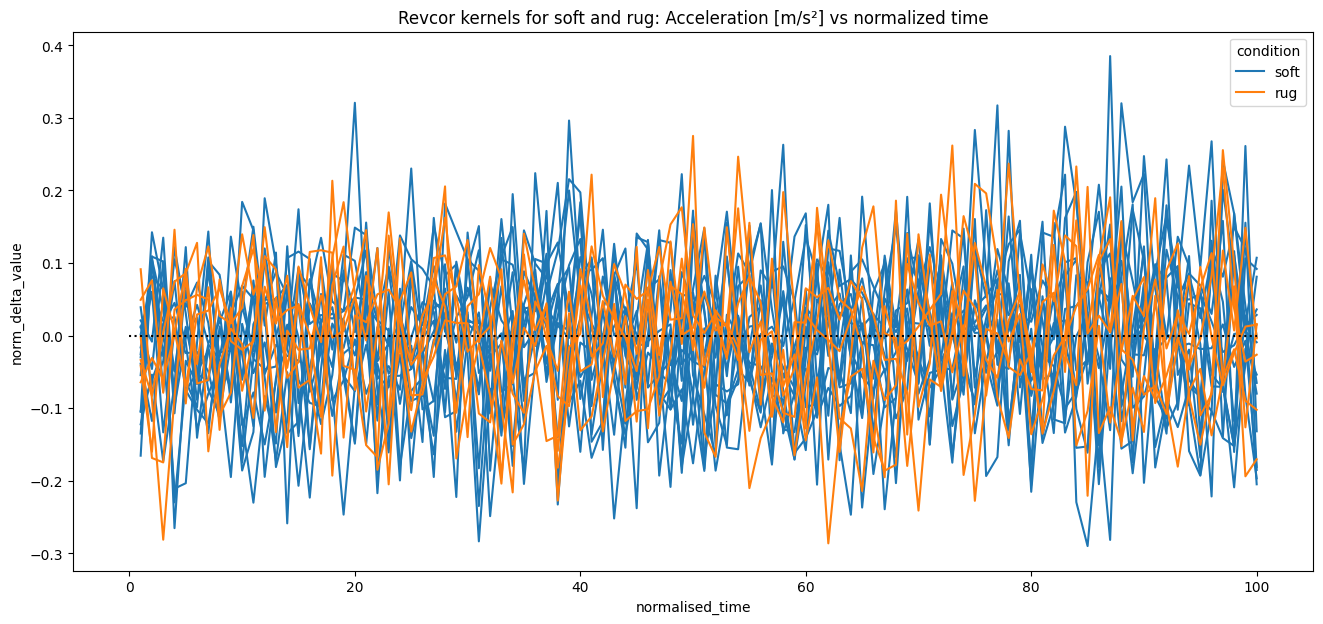

In [26]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Acceleration [m/s²]'],
              hue="condition",
             x="normalised_time",
             y="norm_delta_value",units='subj', estimator=None )
plt.title("Revcor kernels for soft and rug: Acceleration [m/s²] vs normalized time")
plt.plot([0,100],[0,0],'k:')

## Spectral kernels

In [27]:
from scipy.fft import fft, fftfreq

### Low-frequency Spectrum (FFt of resampled time)

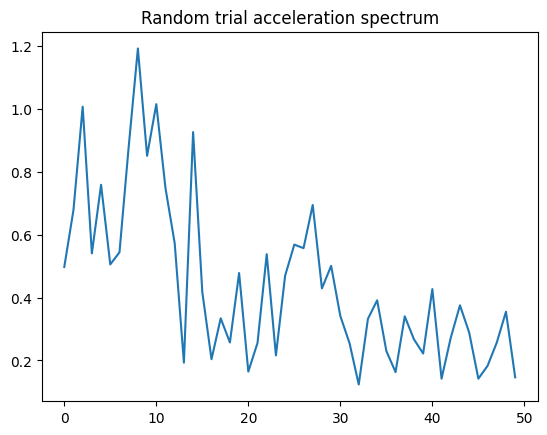

In [28]:
sig = resampled_data_ker[(resampled_data_ker.subj==6)&(resampled_data_ker.block==1)&(resampled_data_ker.trial==2)&(resampled_data_ker.stim_order==1)]['Acceleration [m/s²]']
#plt.plot(sig)
plt.title("Random trial acceleration spectrum")
N = len(sig)
T = 1/100 # on average, 1sec duration, 100 steps
yf = fft(sig)
xf = fftfreq(len(sig), T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

In [29]:
def extract_fft(group):
    n = len(group)  # a group is a single mechanical signal
    group = group.reset_index(drop=True)
    T = 1/100 # on average, 1sec duration, 100 steps
    fftd = {}
    f = fft(group.value)
    fftd['value'] = 2.0/n * np.abs(f[0:n//2])
    new_group = pd.DataFrame(fftd)
    # Add freq
    new_group['freq'] = fftfreq(n, T)[:n//2] 
    return new_group
    
fft_data = (
    data_melt.groupby(['subj','sex','age','condition','block','trial','stim_order','response','feature'])
           .apply(extract_fft,include_groups=False)
           .reset_index()
)
fft_data

,subj,sex,age,condition,block,trial,stim_order,response,feature,level_9,value,freq
0,6,f,23,soft,1,0,1,False,Acceleration [m/s²],0,0.802166,0.0
1,6,f,23,soft,1,0,1,False,Acceleration [m/s²],1,1.042461,1.0
2,6,f,23,soft,1,0,1,False,Acceleration [m/s²],2,0.885499,2.0
3,6,f,23,soft,1,0,1,False,Acceleration [m/s²],3,0.817400,3.0
4,6,f,23,soft,1,0,1,False,Acceleration [m/s²],4,1.087032,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
833195,27,m,20,rug,4,24,2,False,Ft [N],45,0.000625,45.0
833196,27,m,20,rug,4,24,2,False,Ft [N],46,0.000671,46.0
833197,27,m,20,rug,4,24,2,False,Ft [N],47,0.000634,47.0
833198,27,m,20,rug,4,24,2,False,Ft [N],48,0.000699,48.0


In [30]:

# compute difference between positives and negatives in each trial
positives = fft_data.loc[fft_data.response == True].reset_index()
negatives = fft_data.loc[fft_data.response == False].reset_index()
#kernels = pd.merge(positives, negatives, on=['subj','condition', 'sex','age','block','trial','texture_id', 'normalised_time', 'feature'],suffixes=['+','-'])

kernels = pd.merge(positives, negatives, on=['subj','condition','sex','age','block','trial','feature','freq'],suffixes=['+','-'])

kernels['delta_value']=kernels['value+']-kernels['value-']  
kernels.drop(['index+', 'index-',
              'response+','response-',
              'stim_order+','stim_order-',
              'value+','value-'], axis=1, inplace=True)
kernels['square_delta_value'] = kernels['delta_value']**2
for_norm = kernels.groupby(['subj','block','trial','feature']).agg({'square_delta_value':'mean'}).reset_index()
kernels = pd.merge(kernels, for_norm, on=['subj','block','trial','feature'], suffixes=['','_mean'])
kernels['norm_delta_value'] = kernels['delta_value']/np.sqrt(kernels['square_delta_value_mean'])
kernels.drop(['delta_value','square_delta_value', 'square_delta_value_mean',], axis=1, inplace=True)
kernels = kernels.groupby(['subj','condition','feature','freq']).norm_delta_value.mean().reset_index()
 

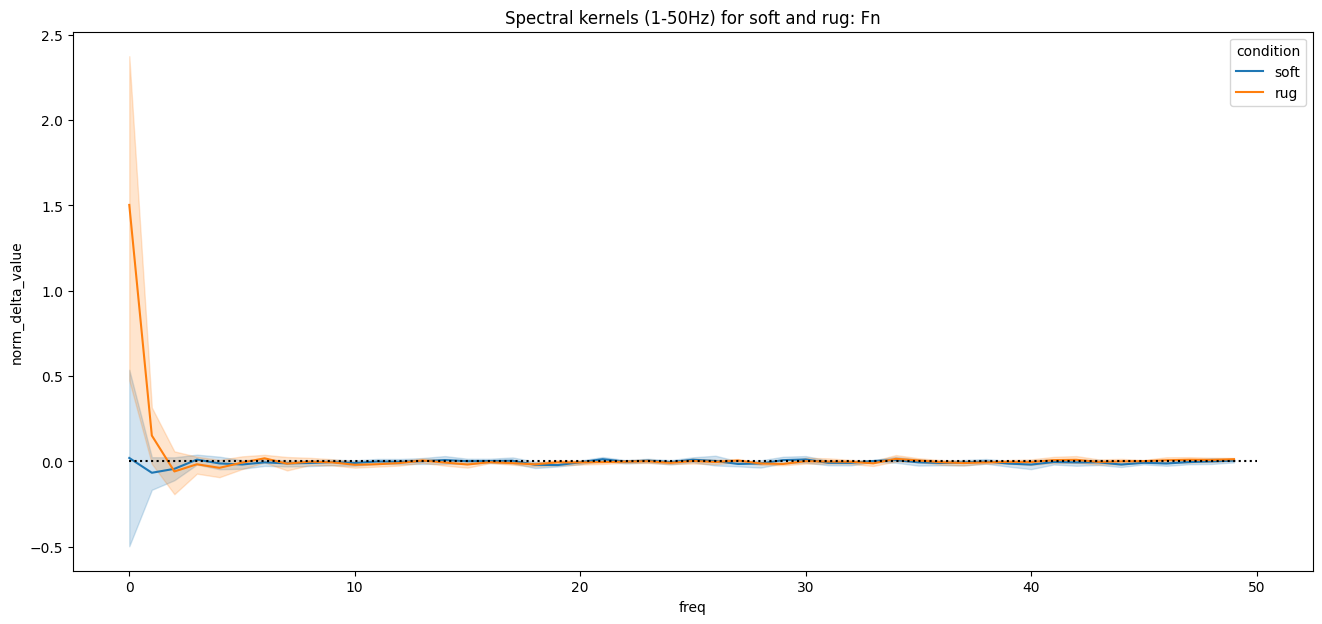

In [31]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Fn [N]'],
              hue="condition",
             x="freq",
             y="norm_delta_value", errorbar=('ci', 95))
plt.title("Spectral kernels (1-50Hz) for soft and rug: Fn")
plt.plot([0,50],[0,0],'k:')

g:\Utilisateurs\fouad.baamal\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
g:\Utilisateurs\fouad.baamal\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


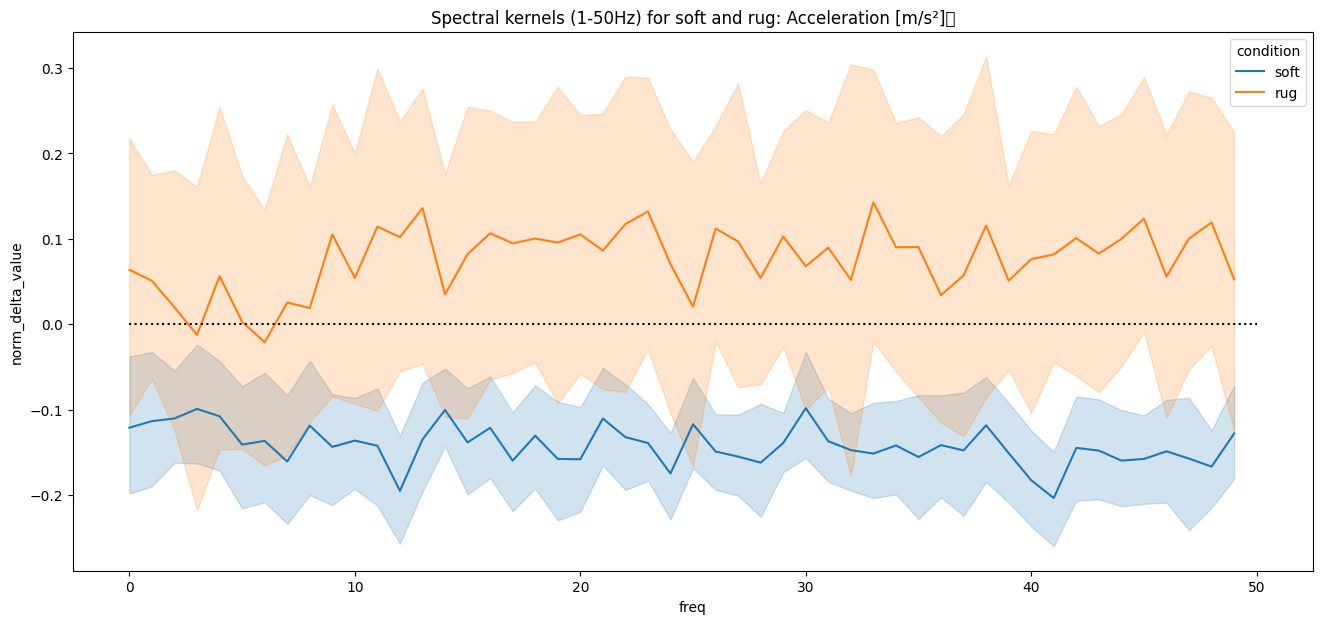

In [32]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Acceleration [m/s²]'],
              hue="condition",
             x="freq",
             y="norm_delta_value", errorbar=('ci', 95))
plt.title("Spectral kernels (1-50Hz) for soft and rug: Acceleration [m/s²]	")
plt.plot([0,50],[0,0],'k:')

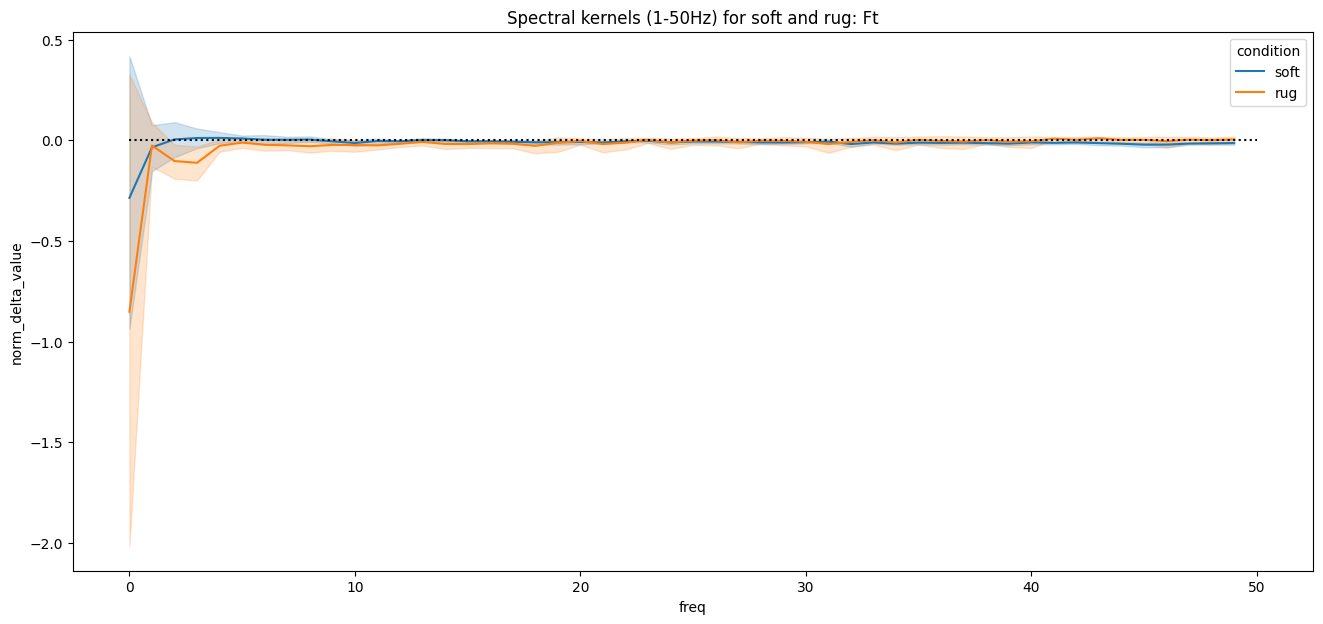

In [33]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Ft [N]'],
              hue="condition",
             x="freq",
             y="norm_delta_value", errorbar=('ci', 95))
plt.title("Spectral kernels (1-50Hz) for soft and rug: Ft")
plt.plot([0,50],[0,0],'k:')

### High frequency spectrum

In [34]:
beha_meca_data

,subj,trial,block,practice,condition,sex,age,date,data_file,texture_id,stim_order,diameter,opening,spacing,response,rt,Displacement [mm],Fn [N],Ft [N],COF [],Acceleration [m/s²],Time [s],normalised_time
0,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,21.289894,0.132235,0.403616,3.052261,-1.965516,2.4468,1.000000
1,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,20.772082,0.130869,0.400328,3.058999,-1.472870,2.4470,1.041949
2,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,20.230913,0.129739,0.399671,3.080563,-1.637156,2.4472,1.083898
3,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,19.661823,0.128897,0.400328,3.105799,-1.670056,2.4474,1.125847
4,6,0,1,False,soft,f,23,2022-11-10 08:22:05.219727,results/221110_08.22_data_subj6_block1_trial0.csv,E030,1,260.0,140.0,400.0,False,10.857,19.084907,0.128146,0.400329,3.124001,-2.162808,2.4476,1.167797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16408124,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,58.631441,1.323029,0.588102,0.444512,1.485856,5.2458,99.803669
16408125,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,58.645615,1.320701,0.590074,0.446789,3.128176,5.2460,99.852752
16408126,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,58.661244,1.318856,0.590403,0.447663,2.931085,5.2462,99.901834
16408127,27,24,4,False,rug,m,20,2022-11-25 17:18:05.980838,results/221125_17.18_data_subj27_block4_trial2...,E075,2,20.0,20.0,40.0,False,7.534,58.678386,1.317370,0.590403,0.448168,1.945676,5.2464,99.950917


In [35]:
beha_meca_data_melt = pd.melt(beha_meca_data,
        id_vars=['subj','trial','block','sex','age','condition','response', 'stim_order', 'texture_id','normalised_time'],
        value_vars=['Fn [N]','Ft [N]', 'COF []', 'Acceleration [m/s²]'],
        var_name='feature')

In [37]:

def extract_all_fft(group):
    n = len(group)  # number of samples in the signal
    group = group.reset_index(drop=True)
    T = 1 / 5000  # sampling interval (s)

    # Compute FFT and corresponding frequencies
    yf = 2.0 / n * np.abs(fft(group.value)[:n // 2])  # amplitude spectrum
    xf = fftfreq(n, T)[:n // 2]  # frequency values

    # Interpolate onto integer frequencies from 1 to 2500 Hz
    integer_freqs = np.arange(1, 2501)  # target frequency axis
    interp_func = interp1d(xf, yf, kind='linear', bounds_error=False, fill_value=0.0)
    yf_interp = interp_func(integer_freqs)

    # Create new DataFrame with standard frequency axis
    new_group = pd.DataFrame({
        'freq': integer_freqs,
        'value': yf_interp
    })

    return new_group
fft_meca_data = (
    beha_meca_data_melt.groupby(['subj','sex','age','condition','block','trial','stim_order','response','feature'])
           .apply(extract_all_fft,include_groups=False)
           .reset_index()
)
fft_meca_data

,subj,sex,age,condition,block,trial,stim_order,response,feature,level_9,freq,value
0,6,f,23,soft,1,0,1,False,Acceleration [m/s²],0,1,0.039288
1,6,f,23,soft,1,0,1,False,Acceleration [m/s²],1,2,0.078577
2,6,f,23,soft,1,0,1,False,Acceleration [m/s²],2,3,0.056444
3,6,f,23,soft,1,0,1,False,Acceleration [m/s²],3,4,0.026115
4,6,f,23,soft,1,0,1,False,Acceleration [m/s²],4,5,0.014129
...,...,...,...,...,...,...,...,...,...,...,...,...
41659995,27,m,20,rug,4,24,2,False,Ft [N],2495,2496,0.000019
41659996,27,m,20,rug,4,24,2,False,Ft [N],2496,2497,0.000035
41659997,27,m,20,rug,4,24,2,False,Ft [N],2497,2498,0.000000
41659998,27,m,20,rug,4,24,2,False,Ft [N],2498,2499,0.000000


In [39]:
# compute difference between positives and negatives in each trial
positives = fft_meca_data.loc[fft_meca_data.response == True].reset_index()
negatives = fft_meca_data.loc[fft_meca_data.response == False].reset_index()
#kernels = pd.merge(positives, negatives, on=['subj','condition', 'sex','age','block','trial','texture_id', 'normalised_time', 'feature'],suffixes=['+','-'])

kernels = pd.merge(positives, negatives, on=['subj','condition','sex','age','block','trial','feature','freq'],suffixes=['+','-'])

kernels['delta_value']=kernels['value+']-kernels['value-']  
kernels.drop(['index+', 'index-',
              'response+','response-',
              'stim_order+','stim_order-',
              'value+','value-'], axis=1, inplace=True)
kernels['square_delta_value'] = kernels['delta_value']**2
for_norm = kernels.groupby(['subj','block','trial','feature']).agg({'square_delta_value':'mean'}).reset_index()
kernels = pd.merge(kernels, for_norm, on=['subj','block','trial','feature'], suffixes=['','_mean'])
kernels['norm_delta_value'] = kernels['delta_value']/np.sqrt(kernels['square_delta_value_mean'])
kernels.drop(['delta_value','square_delta_value', 'square_delta_value_mean',], axis=1, inplace=True)
kernels = kernels.groupby(['subj','condition','feature','freq']).norm_delta_value.mean().reset_index()

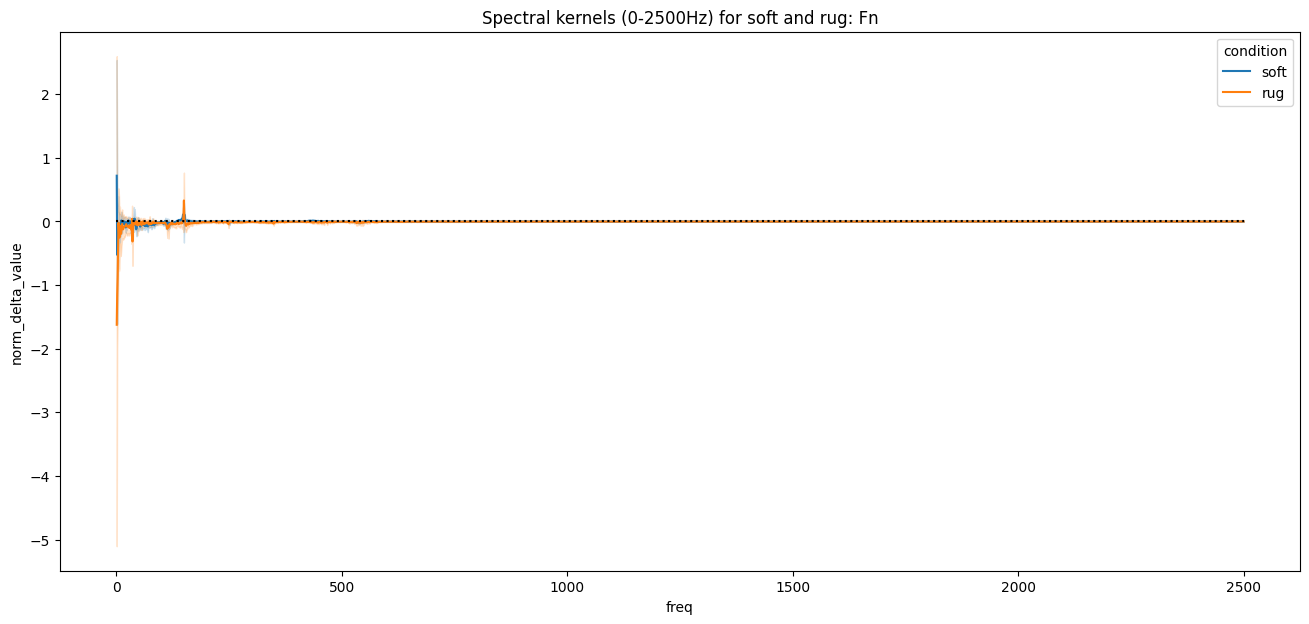

In [43]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Fn [N]'],
              hue="condition",
             x="freq",
             y="norm_delta_value", errorbar=('ci', 95))
plt.title("Spectral kernels (0-2500Hz) for soft and rug: Fn")
plt.plot([0,2500],[0,0],'k:')

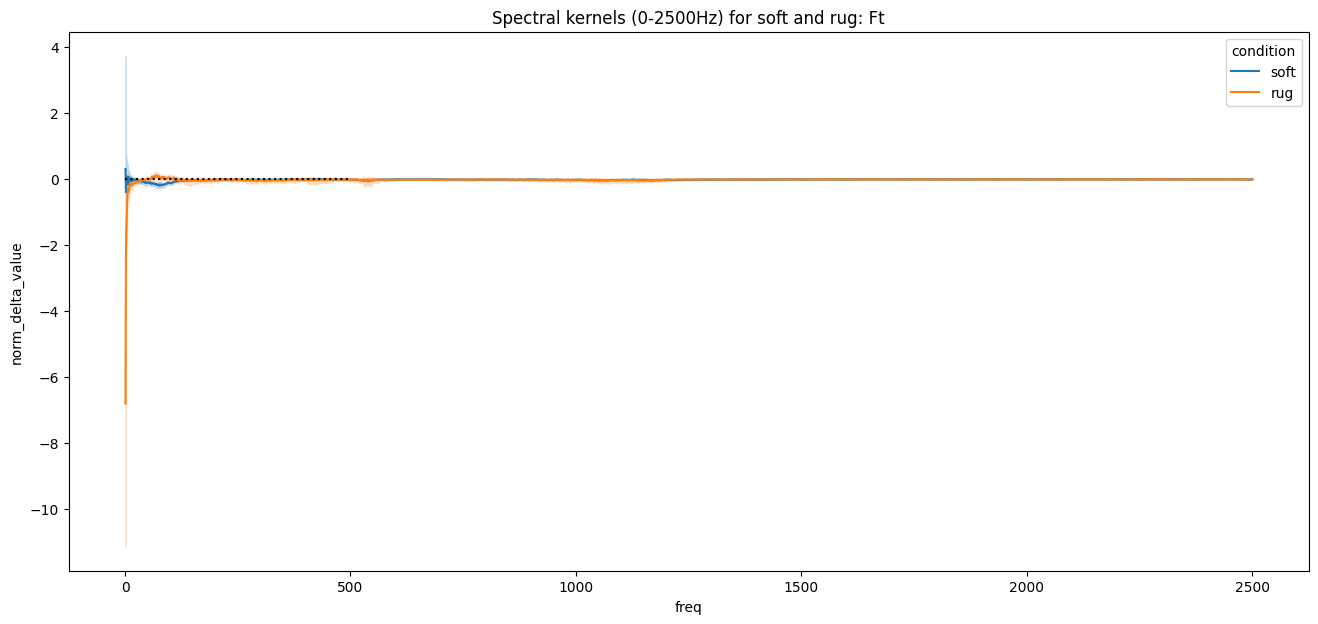

In [ ]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Ft [N]'],
              hue="condition",
             x="freq",
             y="norm_delta_value", errorbar=('ci', 95))
plt.title("Spectral kernels (0-2500Hz) for soft and rug: Ft")
plt.plot([0,2500],[0,0],'k:')

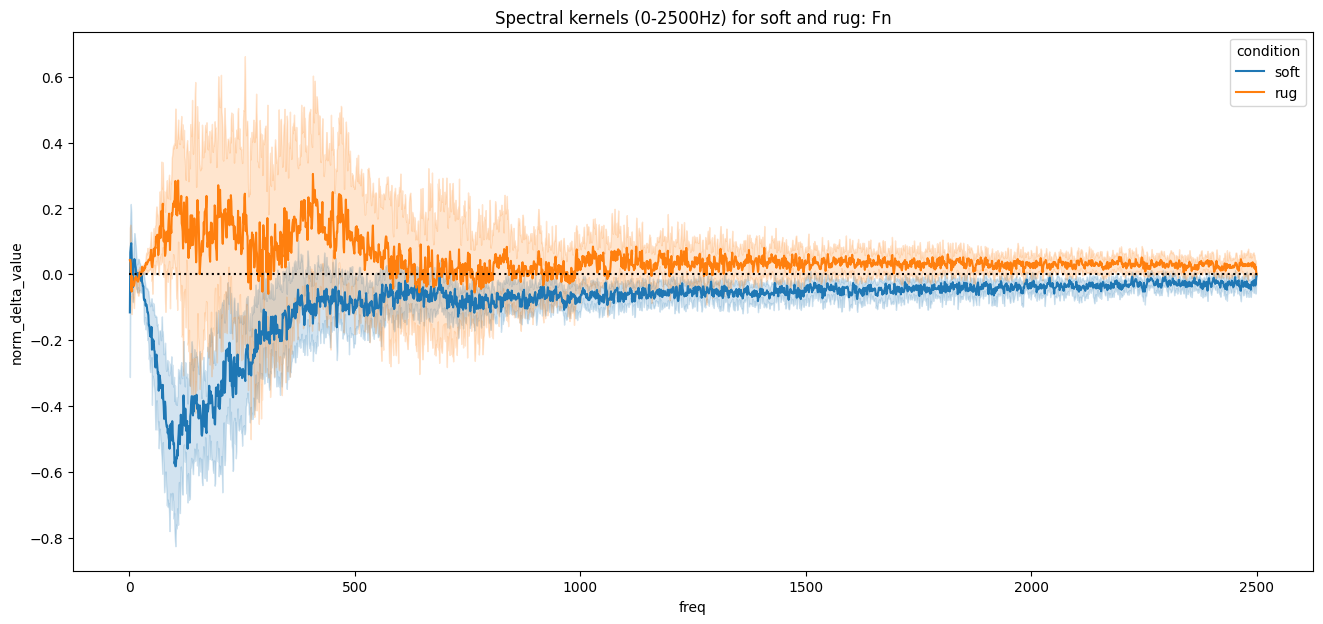

In [ ]:
plt.figure(figsize=(16,7))
sns.lineplot(data=kernels[kernels.feature=='Acceleration [m/s²]'],
              hue="condition",
             x="freq",
             y="norm_delta_value", errorbar=('ci', 95))
plt.title("Spectral kernels (0-2500Hz) for soft and rug: Acceleration")
plt.plot([0,2500],[0,0],'k:')